# Loading and Handling TS in Pandas

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [93]:
DataPath = 'data/TSData.csv'
data = pd.read_csv(DataPath)
data.head()

,Date,Tourists
0,2015-1,137
1,2015-2,141
2,2015-3,147
3,2015-4,145
4,2015-5,107


# Reading as datetime format:

In [94]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(DataPath, parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data.head()

,Tourists
Date,
2015-01-01,137
2015-02-01,141
2015-03-01,147
2015-04-01,145
2015-05-01,107


In [95]:
data.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [96]:
ts = data['Tourists'] 
ts.head(10)

Date
2015-01-01    137
2015-02-01    141
2015-03-01    147
2015-04-01    145
2015-05-01    107
2015-06-01    135
2015-07-01    128
2015-08-01    130
2015-09-01    159
2015-10-01    140
Name: Tourists, dtype: int64

# Indexing TS arrays:

In [97]:
ts['2018-01-01']

158

In [98]:
from datetime import datetime
ts[datetime(2018,1,1)]

158

# Get range:

In [99]:
ts[:'2018-12-01']

Date
2015-01-01    137
2015-02-01    141
2015-03-01    147
2015-04-01    145
2015-05-01    107
2015-06-01    135
2015-07-01    128
2015-08-01    130
2015-09-01    159
2015-10-01    140
2015-11-01    124
2015-12-01    152
2016-01-01    116
2016-02-01    132
2016-03-01    135
2016-04-01    117
2016-05-01    125
2016-06-01    151
2016-07-01    130
2016-08-01    126
2016-09-01    135
2016-10-01    133
2016-11-01    117
2016-12-01    124
2017-01-01    137
2017-02-01    127
2017-03-01    125
2017-04-01    153
2017-05-01    131
2017-06-01    112
2017-07-01    142
2017-08-01    129
2017-09-01    110
2017-10-01    137
2017-11-01    135
2017-12-01    124
2018-01-01    158
2018-02-01    118
2018-03-01    119
2018-04-01    119
2018-05-01    139
2018-06-01    139
2018-07-01    147
2018-08-01    122
2018-09-01    132
2018-10-01    128
2018-11-01    119
2018-12-01    131
Name: Tourists, dtype: int64

In [100]:
ts['2018']

Date
2018-01-01    158
2018-02-01    118
2018-03-01    119
2018-04-01    119
2018-05-01    139
2018-06-01    139
2018-07-01    147
2018-08-01    122
2018-09-01    132
2018-10-01    128
2018-11-01    119
2018-12-01    131
Name: Tourists, dtype: int64

# Checking for stationarity

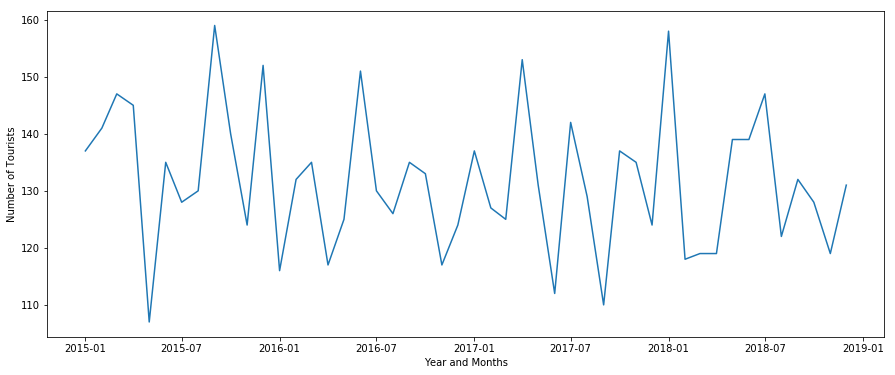

In [101]:
plt.xlabel("Year and Months")
plt.ylabel("Number of Tourists")
plt.plot(ts)

# Function for testing stationarity

In [102]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


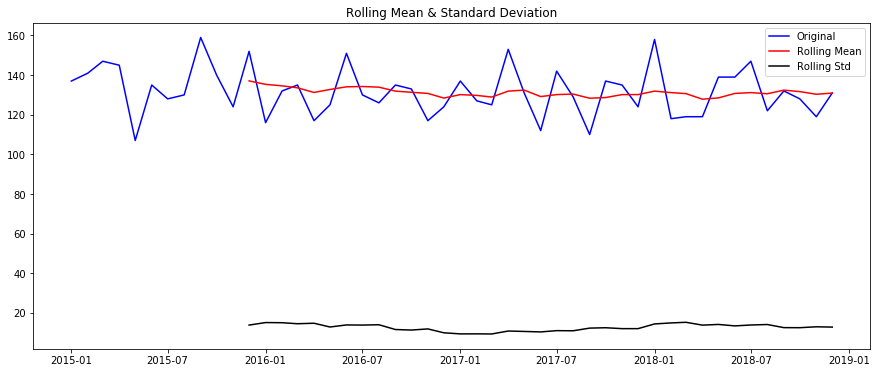

Results of Dickey-Fuller Test:
Test Statistic                 -5.321588
p-value                         0.000005
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [103]:
test_stationarity(ts)

# Making TS Stationary
Estimating & Eliminating Trend

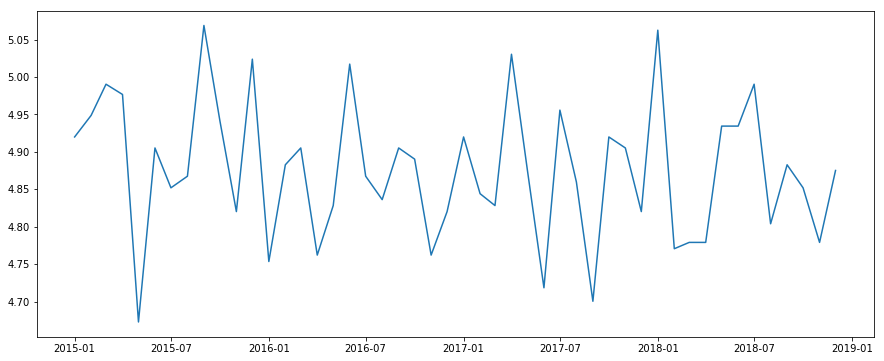

In [104]:
ts_log = np.log(ts)
plt.plot(ts_log)

# Smoothing:
Moving average

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


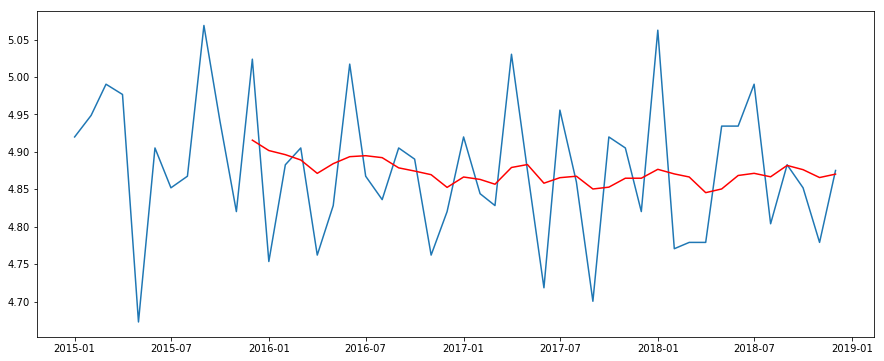

In [105]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [106]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2015-01-01        NaN
2015-02-01        NaN
2015-03-01        NaN
2015-04-01        NaN
2015-05-01        NaN
2015-06-01        NaN
2015-07-01        NaN
2015-08-01        NaN
2015-09-01        NaN
2015-10-01        NaN
2015-11-01        NaN
2015-12-01    0.10819
Name: Tourists, dtype: float64

In [107]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Date
2015-12-01    0.108190
2016-01-01   -0.148234
2016-02-01   -0.013526
2016-03-01    0.016043
2016-04-01   -0.109178
Name: Tourists, dtype: float64

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


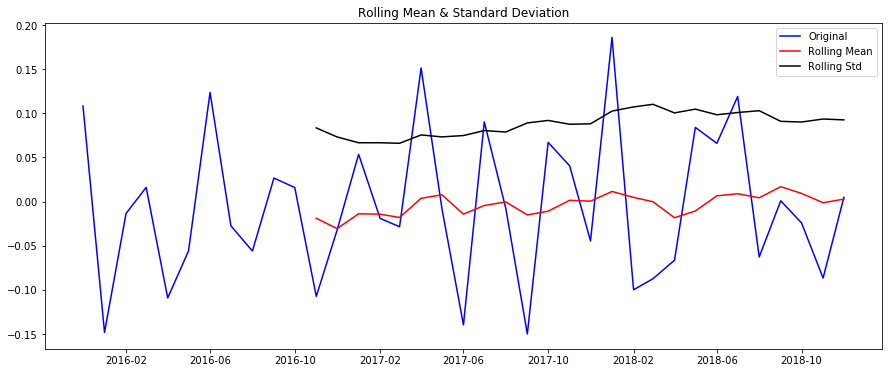

Results of Dickey-Fuller Test:
Test Statistic                 -5.615174
p-value                         0.000001
#Lags Used                      4.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


In [108]:
test_stationarity(ts_log_moving_avg_diff)

# Exponentially Weighted Moving Average

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


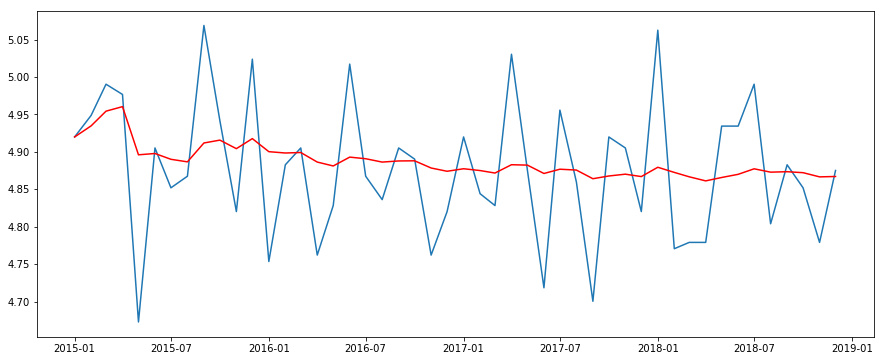

In [109]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


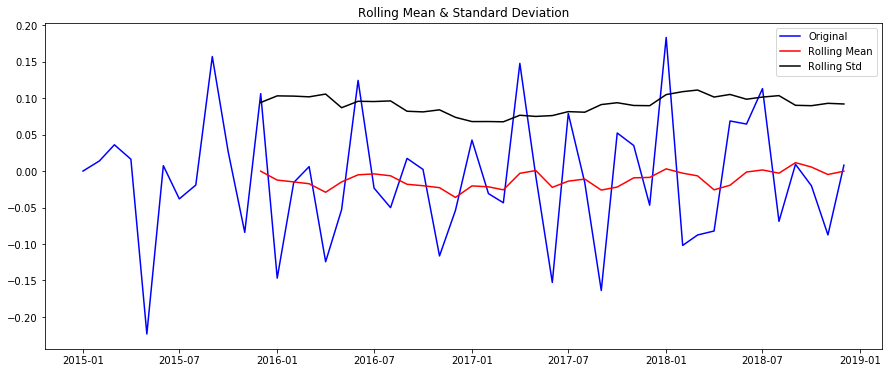

Results of Dickey-Fuller Test:
Test Statistic                -6.416300e+00
p-value                        1.837703e-08
#Lags Used                     4.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


In [110]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Eliminating Trend and Seasonality
Differencing:

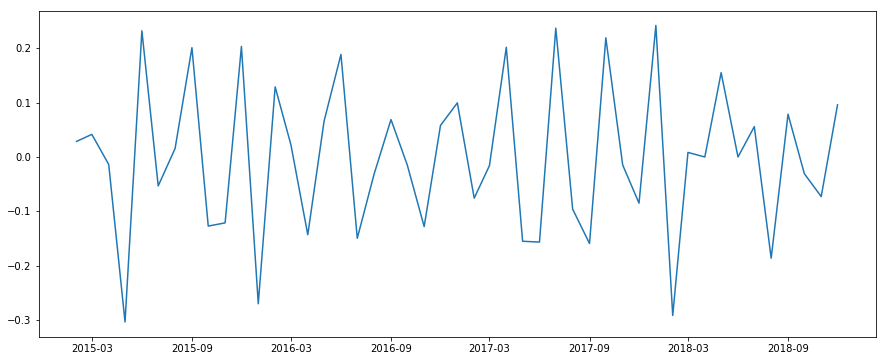

In [111]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


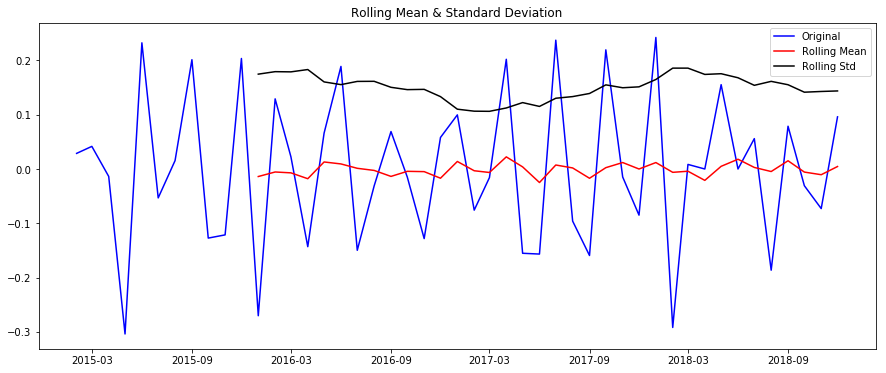

Results of Dickey-Fuller Test:
Test Statistic                 -4.922358
p-value                         0.000032
#Lags Used                      9.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [112]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposition:

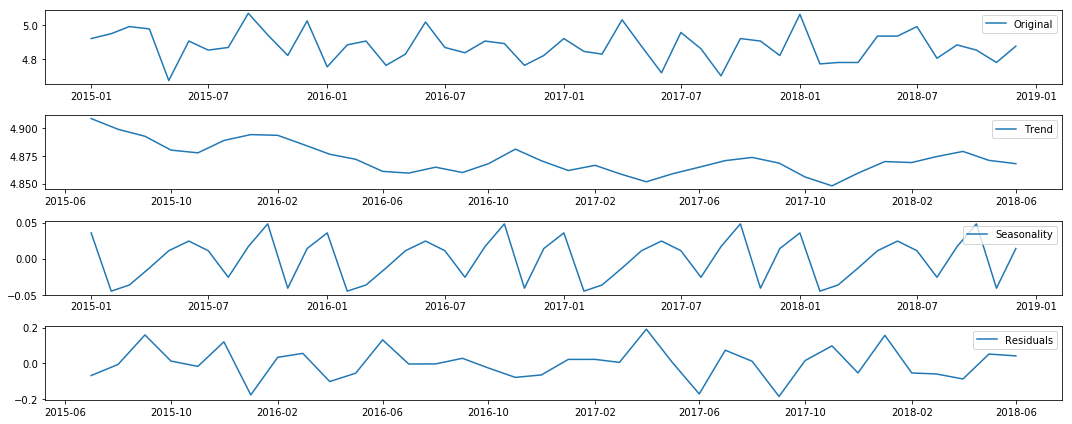

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


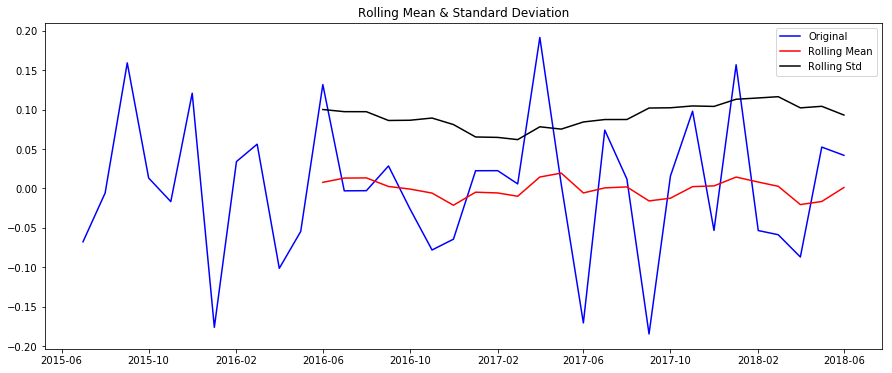

Results of Dickey-Fuller Test:
Test Statistic                 -4.102246
p-value                         0.000960
#Lags Used                      8.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [114]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [115]:
from statsmodels.tsa.arima_model import ARIMA

# ACF & PACF Plots

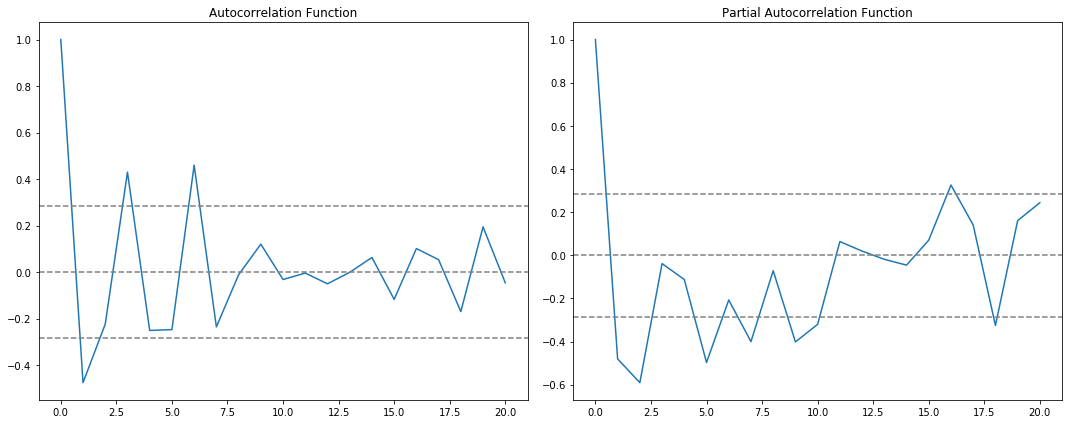

In [116]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# AR Model:

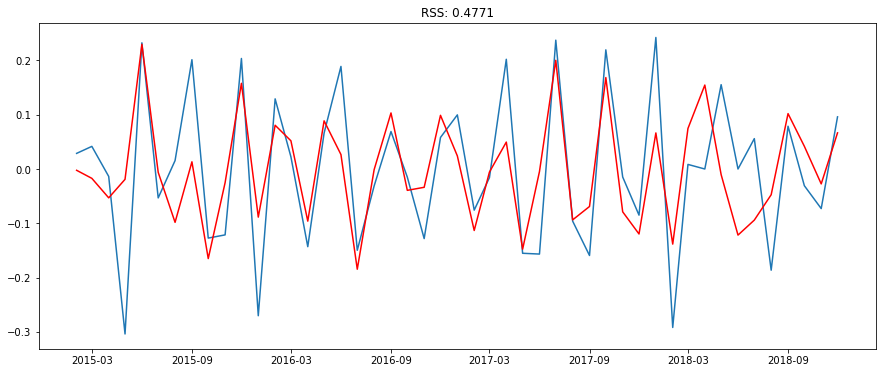

In [117]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# ARIMA Model:

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


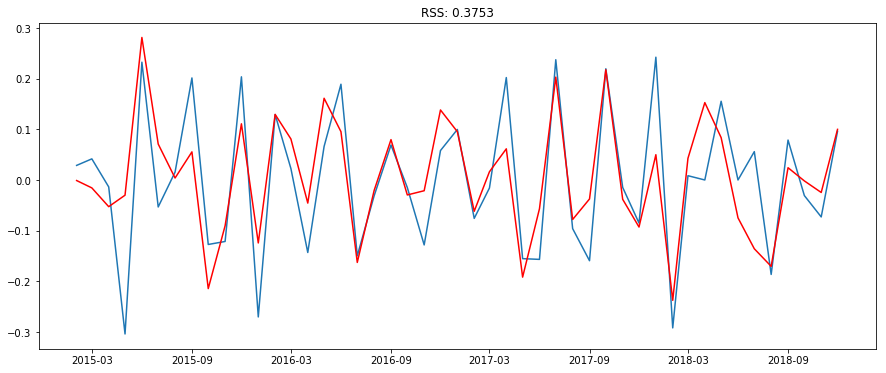

In [118]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Convert to original scale:

In [119]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2015-02-01   -0.001088
2015-03-01   -0.015636
2015-04-01   -0.052653
2015-05-01   -0.030020
2015-06-01    0.281258
dtype: float64

In [120]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2015-02-01   -0.001088
2015-03-01   -0.016724
2015-04-01   -0.069378
2015-05-01   -0.099398
2015-06-01    0.181860
dtype: float64

In [121]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Jobair_Joty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Date
2015-01-01    4.919981
2015-02-01    4.918893
2015-03-01    4.903257
2015-04-01    4.850603
2015-05-01    4.820583
dtype: float64

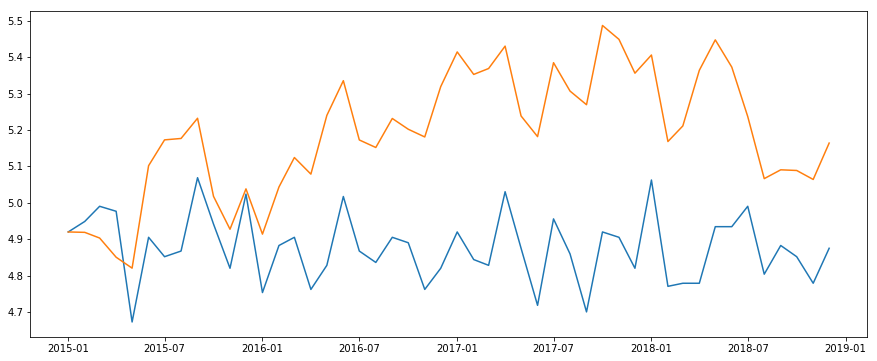

In [122]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

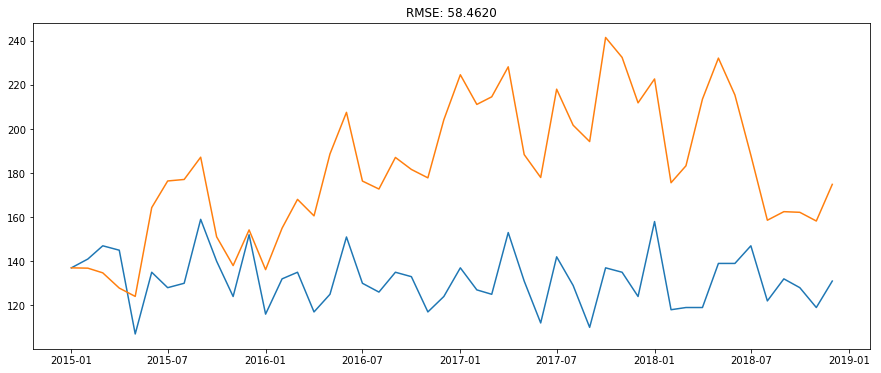

In [123]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))